# Problem 3 - Attention in Transformer

## 3.1

**Answer:**

In the self-attention block in a Transformer 3 vectors are derived - Query vector (Q), Key vector (K), and Value vector (V). Query vector represent a word or token that we are currently focusing on in the attention block. Key vectors are representations of all the words in the input that are used for comparison with the Query vectors. Value vector has the content of the word representations that will be used to construct the output of the self-attention layer. Query and Key vectors are used / involved in calculating attention scores while Value vectors are weighted by these attention scores to form the output of the self-attention layer for each word.


## 3.2

**Answer:**

As mentioned in previous part, we use Query and Key vectors to calculated softmax scores for attention. This is done by calculating the dot product of the Query vectors (for each word) with all Key vectors (for all words in the sequence) to obtain the scores. This score tells us how much focus 1 word should have on other words. A common next step before applying softmax function is to scale the dot product values by dividing them by the square root of the dimension of the key vectors. This helps us avoid very smal gradients that come from training due to the large dot products. Scaling the results helps us stabilize the gradients before passing them through softmax layer. The scores we obtained will be normalized using a softmax layer while making sure they sum to 1 - thus they are converted to probabilities. Softmax is a very useful fucntion as it also helps us differentiate bettwe scores by amplifying the highest scores and suppressing the lower scores. At the end, each score represents the amount of attention (as a probability) that the word should give to each other word in the sequence.


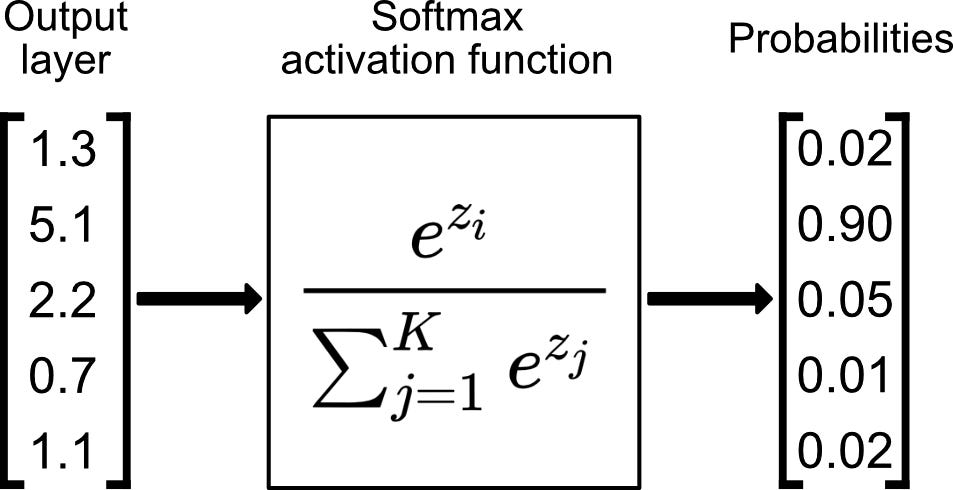

## 3.3

**Answer:**

Multi-headed attention is useful as it allows the model to work with informatoin from different "representation subspaces" at different positions at the same time. For each head in the mechanism can focus on different parts of the input which results in capturing more different aspects of the input data.

In each single head we have 3 weight matrices - one for query, one for key and one for value. Thus, for 8 heads we have 24 weight matrices.

Since we know our input vector is of size 512, the weight matrices (query, key and value) for each head will map from the 512 dimensional space. Since the output vector is of size 512 our weight matrices for each head will map to 512 dimensional space. This means that the dimension, and thus size, of these matrices are 512 x 512.

Further, as transformation is applied to each word vector individually, number of word embeddings does not change the size of the matrices, and thus for each of our 4 (512 dimensional) word embeddings each of our matrices will have the size of 512 x 512.

## 3.4

The feed-forward layer following the self-attention is expecting a single matrix (a vector for each word). How can we go from the output of multiple heads to a single matrix input for the feed-forward layer? (3)

**Answer:**

As mentioned in part 3, each head produces an output vector for each word in the input sequence. Size of each output vectors from a head is usually smaller than oroginal embedding size. In other words, unlike in part 3 where size of our input and output was 512, generally we would expect a smaller output size such as 64 rather than 512.

In order to get a single matrix, after the heads output vectors, they are concatenated to form a single long vector for each word. For instance if each of our 8 heads (example from 3) outputs the vector of size 64, the concatenated vector will have size of 8 x 64 = 512.
After concatenation is done and all of the outputs from all heads are in 1 single long vector (for each word) we pass this vector through linear transformation. We do this by using another learned weight matrix - $W^O$ - (O stnands for output). The linear transformation is crucial as it allows the model to combine and reproject the information from all the heads into a coherent representation. It also makes sure that the output has the same dimension as the original input embeddings, making the layer compatible with the rest of the model's architecture. The output from this process is a single matrix in which each row corresponds to the combined representations of a word in the input sequence and this matrix is used as an input for the feed-forward layer of the model.